# Support Vector Machine

Here we approach the two-class classification problem in a direct way

We try to find a plane that separates the classes into feature space

If we can't, we can get creative in two ways:
- We soften what we mean by "separates", and
- We enrich and enlarge the feature space so that separation is possible.

***R Package*** - https://cran.r-project.org/web/packages/e1071/index.html

***Python package*** - https://scikit-learn.org/stable/modules/svm.html#svm 

## Definition: Hyperplane

- A hyperplane in p dimensions is a flat affline subspace of dimension p - 1.
- In general the equation of a hyperplane has the form:
$\beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_pX_p = 0$
- In $p = 2$ dimensions a hyperplane is a line.
- if $\beta_0 = 0$ , the hyperplane goes through the origin, otherwise not.
- The vector $\beta = (\beta_1, \beta_2,...,\beta_p)$ is called the normal vector - it points in a direction orthogonal to the sufface of a hyperplane.

## Separating Hyperplanes

- if $f(X) = \beta_0 + \beta_1X_1 + ... + \beta_pX_p$, then $f(X) > 0$ for points on one side of the hyperplane, and $f(X) < 0$ for points on the other.
- If we code the colored points as $Y_i = +1$ for blue, say, and $Y_i = -1$ for mauve, then $Y_i * f(X) > 0$ for all $i$, $f(X) = 0$ defines a separating hyperplane.


## Maximal Margin Classifier (Constrained Optimization Problem)


## Linear Boundry can fail
- Sometimes a linear boundary simply won't work, no matter what value of $C$. 
- The example below is such a case


## Feature Expansion



# 9.6 Support Vector Machines



In [2]:
import numpy as np
from matplotlib.pyplot import subplots, cm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

In [3]:
# We will use the function RocCurveDisplay.from_estimator() to 
# produce several ROC plots, using a shorthand roc_curve.
roc_curve = RocCurveDisplay.from_estimator

# 9.6.1 Support Vector Classifier 
We will use the `SupportVectorClassifier (SVC)` function from `sklearn` to fit the support vector classifier for a given value of the parameter `C`. 
- `C` allows us to specify the cost of a violation to the margin. 
    - when the `cost` argument is small, the margins will be wide and many support vectors will be on the margin or will violate the margin. 
    - when the `cost` argument is large, the margins will be narrow and there will be few support vectors on the margin or violating the margin

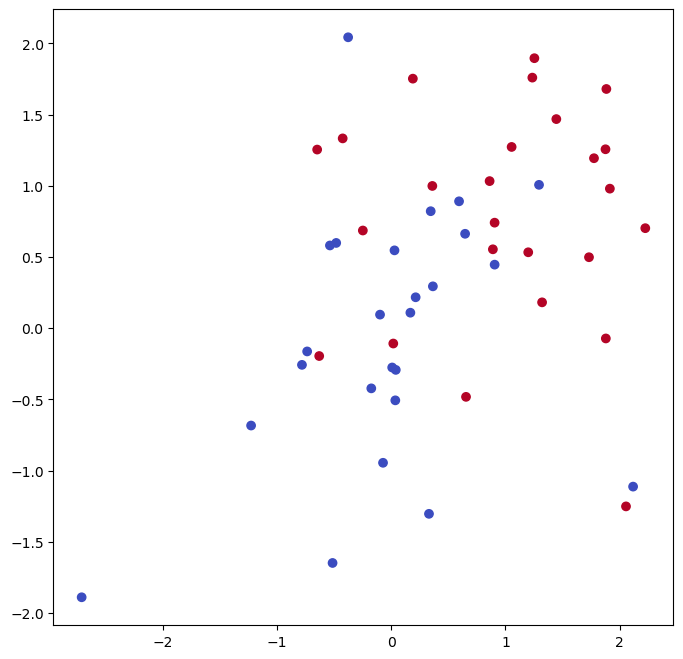

In [8]:
# construct a random generator object
rng = np.random.default_rng(1)

# create X and y
X = rng.standard_normal((50,2))
#print(f"X: {X}")
y = np.array([-1] * 25 + [1] * 25)
#print(f"y: {y}")

X[y==1] += 1
#print(f"X updated: {X}")
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
          X[:,1],
          c=y,
          cmap=cm.coolwarm)


In [10]:
# lets fit a classifier
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X,y)

SVC(C=10, kernel='linear')

The support vector classifier with two features can be visualized by plotting values of its ***decision function***

The decision boundary between the two classes is linear because we used the argument `kernal='linear'`.

The support vectors are marked with `+` and the remaining observations are plotted as circles. 

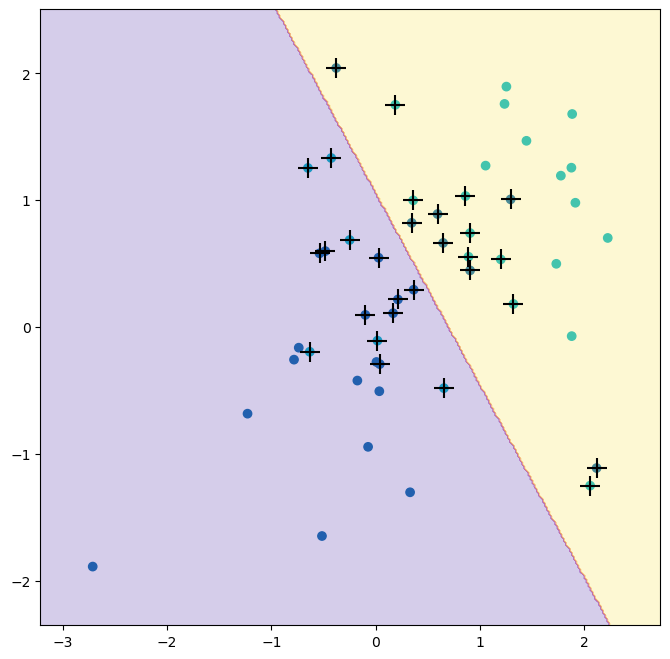

In [12]:
fig, ax = subplots(figsize=(8,8)) 
plot_svm(X, y, svm_linear , ax=ax)

What if we used a smaller value of the cost parameter?


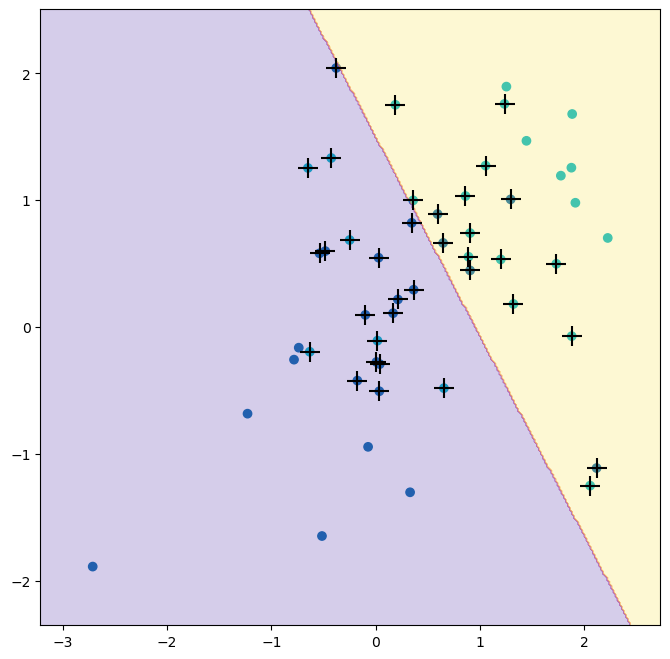

In [13]:
# initialize and fit linear SVC model
svm_linear_small = SVC(C=0.1, kernel='linear')
svm_linear_small.fit(X, y)

# plot
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
        y,
        svm_linear_small,
        ax=ax)


With a smaller value of the cost parameter, we obtain a larger number of support vectors, because the margin is now wider.

For linear kernels, we can extract the coefficients of the linear decision boundary as follows:

In [16]:
print(f"svm_linear.coef_ : {svm_linear.coef_}")
print(f"svm_linear_small.coef_ : {svm_linear_small.coef_}")

svm_linear.coef_ : [[1.17303943 0.77348227]]
svm_linear_small.coef_ : [[0.71529828 0.45433662]]


### Tuning
Since the support vector machine is an estimator in `sklearn`, we can use the usual machinery to tune it.

Here we will use a k-fold cross validaiton approach.

We can easily access the cross-validation errors for each of these models in `grid.cv_results_`. This prints out a lot of detail, so we extract the accuracy results only.


In [17]:
kfold = skm.KFold(5,
                 random_state=0,
                 shuffle=True)

grid = skm.GridSearchCV(svm_linear,
                       {'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]},
                       refit=True,
                       cv=kfold,
                       scoring='accuracy')

grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(C=10, kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]},
             scoring='accuracy')

In [18]:
grid.best_params_

{'C': 1}

In [19]:
grid.cv_results_[('mean_test_score')]

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

We see that C=1 results in the highest cross-validation accuracy of 0.74, though the accuracy is the same for several values of `C`.

The classifier `grid.best_estimator_` can be used to predict the class label on a set of test observations. 

Let's generate a test data set

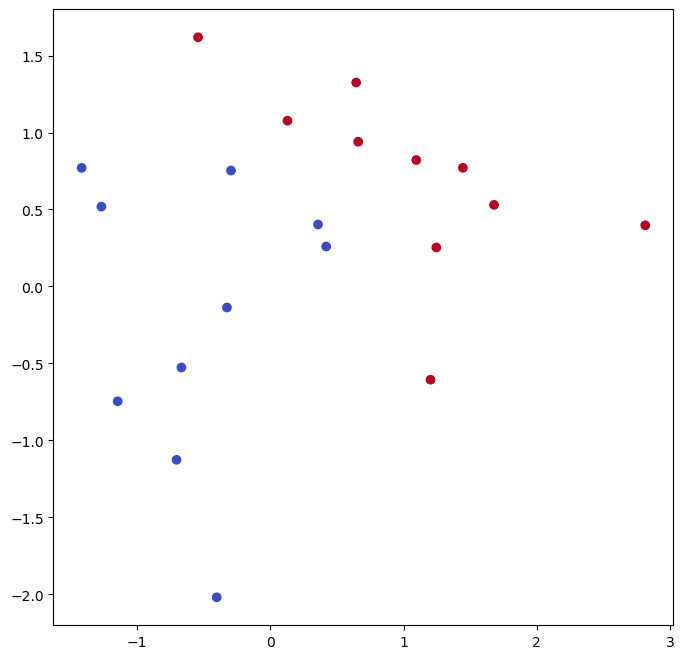

In [23]:
# lets create our X and Y data
X_test = rng.standard_normal((20, 2))
y_test = np.array([-1]*10 + [1]*10)
X_test[y_test==1] += 1

# lets plot our data
fig, ax = subplots(figsize=(8,8))
ax.scatter(X_test[:,0],
          X_test[:,1],
          c=y_test,
          cmap=cm.coolwarm)

In [25]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,10,3
1,0,7


We see that we have a 85% of our test observences classified correctly, what if we used C=0.001?

In [27]:
svm_ = SVC(C=0.001,
          kernel='linear').fit(X,y)
y_test_hat = svm_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,6,0
1,4,10


80% of our test observences were classified correctly

Let's consider the situation in which the two classes are linearly separable. Then we can find an optimal separating hyperplane using the `SVC` estimator. We first further separate the two classees in our simulated data so that they are linearly separable:

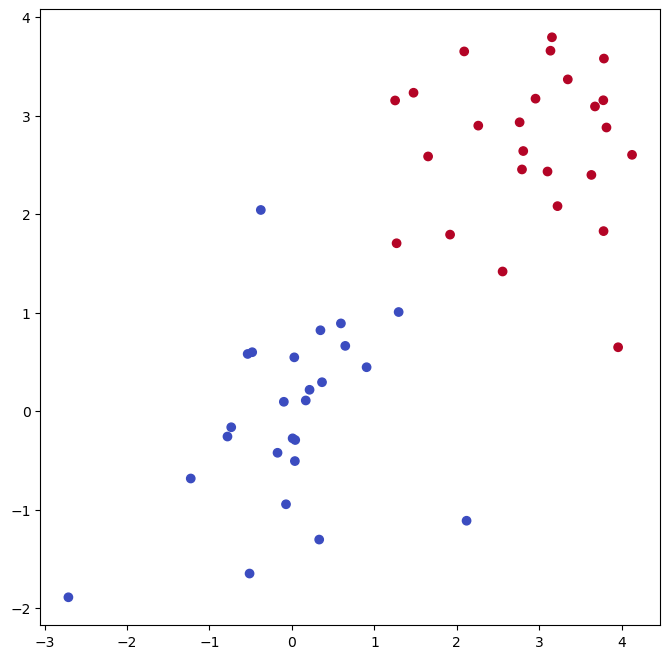

In [28]:
X[y==1] += 1.9

fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
          X[:,1],
          c=y,
          cmap=cm.coolwarm)


In [30]:
svm_ = SVC(C=1e5,
          kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


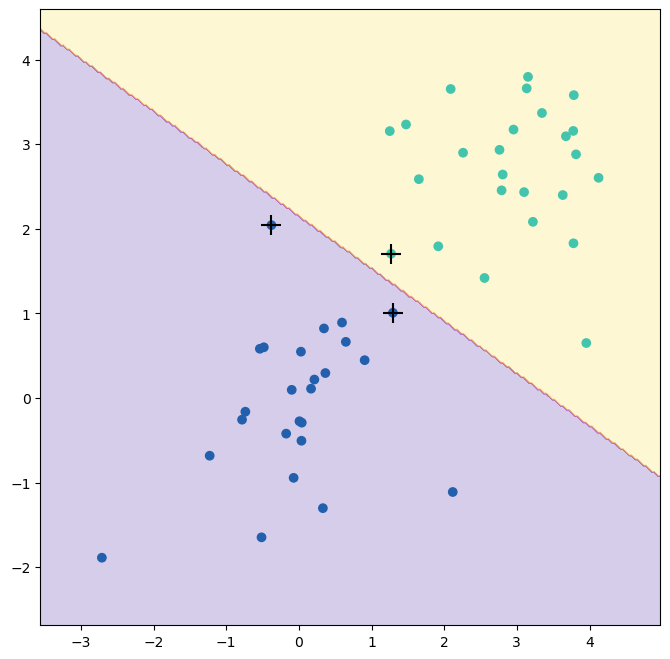

In [31]:
fig, ax = subplots(figsize=(8,8)) 
plot_svm(X,
         y, 
         svm_ , 
         ax=ax)

No training errors have been made but only three support vectors were used. In fact, the large value of `C` also means that these three support points are *on the margin*, and define it. 

One may wonder how good the classifier could be on a test data that depends on only three data points, lets try with a smaller value for `C`.

In [32]:
svm_ = SVC(C=0.1,
          kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


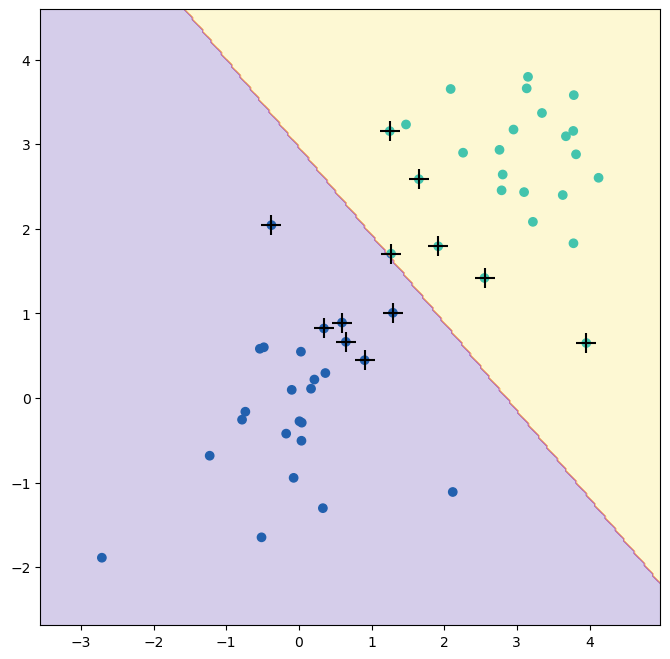

In [33]:
fig, ax = subplots(figsize=(8,8)) 
plot_svm(X,
         y, 
         svm_, 
         ax=ax)

Using `C=0.1` we also do not misclassify any training observations, but we also obtain a much wider margin and make use of twelve support vectors. 

These jointly define the orientation of the decision boundary, and since there are more of them, it is more scalable. It seems possible that this model will perform better on test data than the model with `C=1e5` ( and indeed, a simple experiment with a large test set would bear this out)

# 9.6.2 Support Vector Machine

In order to fit an SVM using a non-linear kernel, we once again use the `SVC()` estimator. 

However, now we use a different value of the parameter `kernel`. To fit an SVM with a polynomial kernel we use `kernel='poly'`, and to fit an SVM with a radial kernel we use `kernel='rbf'`. In the former case we also use the `degree` argument to specify a degree for the polynomial kernel, and in the latter case we use `gamma` to specify a value of $\gamma$ for the radial basis kernel.

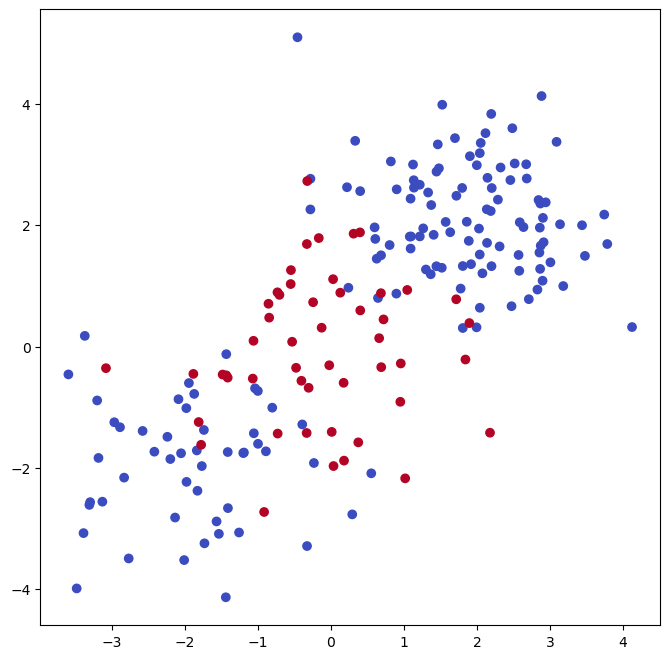

In [34]:
# Generate some data with a non-linear class boundary
X = rng.standard_normal((200,2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150 + [2]*50)

# plot the data

fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
          X[:,1],
          c=y,
          cmap=cm.coolwarm)



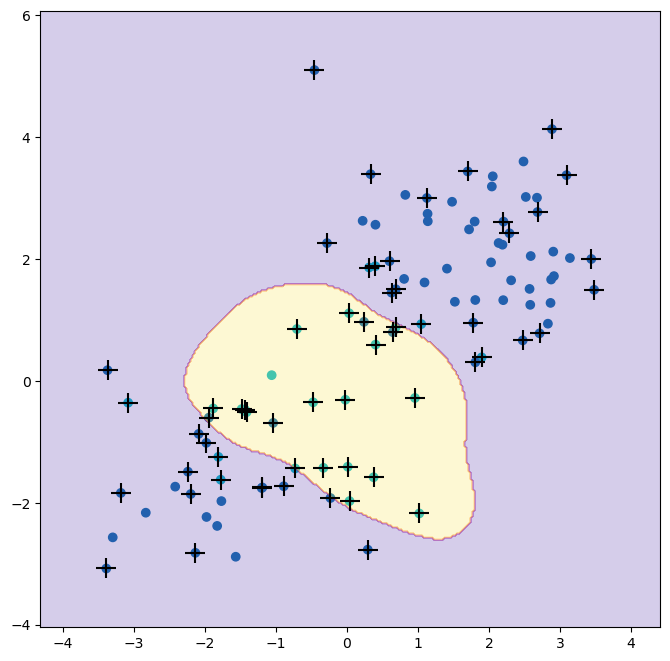

In [36]:
# split the data randomly into training and testing groups

(X_train, 
 X_test, 
 y_train, 
 y_test) = skm.train_test_split(X,
                               y,
                               test_size=0.5,
                               random_state=0)

# fit the training data using the SVC estimator with a radial kernel
# and gamma = 1

svm_rbf = SVC(kernel='rbf', gamma=1, C=1)
svm_rbf.fit(X_train, y_train)

# plot the SVM decision boundary 
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
        y_train,
        svm_rbf,
        ax=ax)



We can see from this figure that there are a fair number of training errors in the fit.

If we increase our `C`, we can reduce the number of training errors. However, this comes at the price of a more irregular decision boundary that seems to be at rist of overfitting the data.

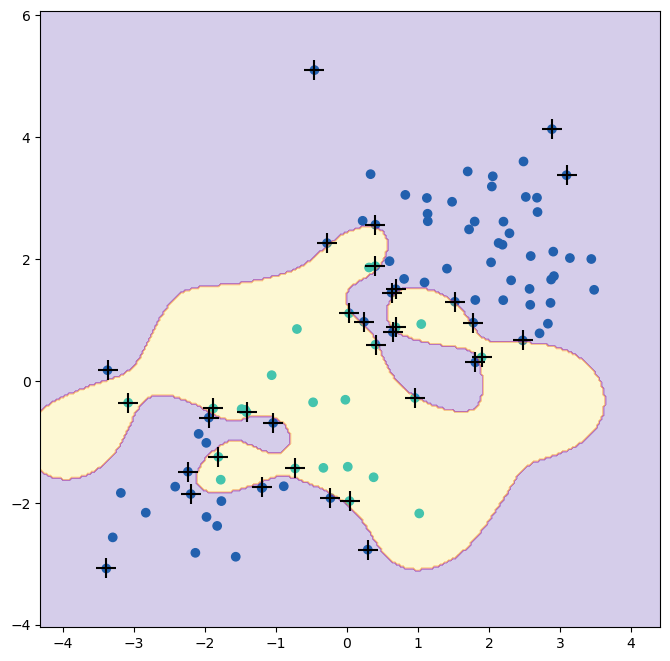

In [37]:
svm_rbf = SVC(kernel='rbf', gamma=1, C=1e5)
svm_rbf.fit(X_train, y_train)
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
        y_train,
        svm_rbf,
        ax=ax)

## Perform Gridsearch to optimize gamma and C

We can perform cross-validation using `skm.GridSearchCV()` to select the best choice of $\gamma$ and `C` for an SVM with a radial kernel:

In [56]:
kfold = skm.KFold(5,
                 random_state=0,
                 shuffle=True)

grid = skm.GridSearchCV(svm_rbf,
                       {'C': [0.1, 1, 10, 100, 1000],
                       'gamma': [0.5, 1, 2, 3, 4]},
                       refit=True,
                       cv=kfold,
                       scoring='accuracy')

grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(C=100000.0, gamma=1),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.5, 1, 2, 3, 4]},
             scoring='accuracy')

In [57]:
grid.best_params_

{'C': 1000, 'gamma': 0.5}

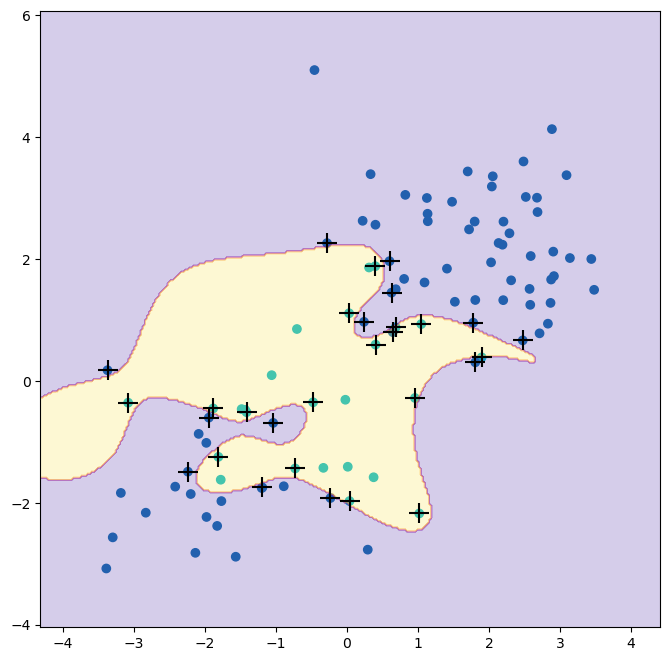

In [58]:
best_svm = grid.best_estimator_
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
        y_train,
        best_svm,
        ax=ax)

In [52]:
y_hat_test = best_svm.predict(X_test)
confusion_table(y_hat_test, y_test)

Truth,1,2
Predicted,,
1,63,7
2,12,18


With these parameters, 19% of the test observations are misclassified by this SVM

# ROC Curves
SVMs and support vector classifiers output class labels for each observation. However, it is also possible to obtain *fitted values* for each observation, which are the numerical scores used to obtain the class labels. For instance, in the case of a support vector classifier, the fitted value for an observation $X = (X_1, X_2, ..., X_p)^T$ takes the form $\hat{\beta}_0 + \hat{\beta}_1X_1 + ... + \hat{\beta}_pX_p$.

For an SVM with a non-linear kernel, the equation that yields the fitted value is given in 9.23. The sign of the fitted value determines on which side of the decision boundary the observation lies. Therefor the relationship between the fitted value and the class prediction for a given observation is simple: if the fitted value exceeds zero than the observation is assigned to one class, and if it is less than zero it is assigned to the other class. 

By changing the threshold for zero to some positive value, we skew the classifications in favor of one class vs the other. By considering a range of these threshold, positive and negative, we produce the ingredients for a ROC plot. We can access these values by calling the `decision_function()` method of a fitted SVM estimator.

The function `ROCCurveDisplay.from_estimator()` (which we have abbreviated to `roc_curve()`) will produce a plot of a ROC curve. It takes a fitted estimator as its first argument, followed by a model matrix $X$ and labels $y$. The argument `name` is used in the legend, while `color` is used for the color of the line. Results are plotted on our axis abject `ax`.



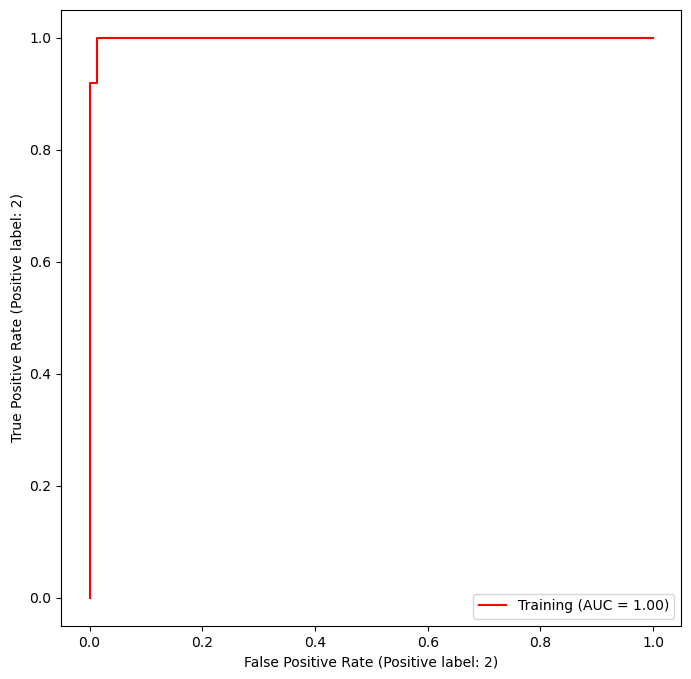

In [65]:
fig, ax = subplots(figsize=(8,8))
roc_curve(best_svm,
         X_train,
         y_train,
         name='Training',
         color='r',
         ax=ax)

In this example, the SVM appears to provide accurate predictions. By increasing $\gamma$ we can produce a more flexible fit and generate further improvements in accuracy.

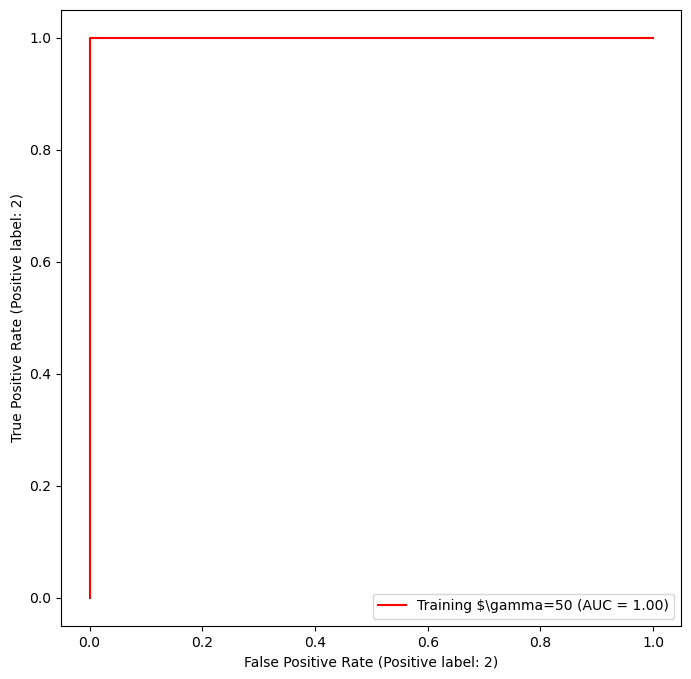

In [66]:
svm_flex = SVC(kernel='rbf',
              gamma=50,
              C=1)

svm_flex.fit(X_train, y_train)
fig, ax = subplots(figsize=(8,8))
roc_curve(svm_flex,
         X_train,
         y_train,
         name='Training $\gamma=50',
         color='r',
         ax=ax)

NOTE: these ROC curves are all on training data. We are more interested in the level of prediction accuracy on the test data. When we computer the ROC curves on the test data, the model with $\gamma = 0.5$ appears to provide the most accurate results

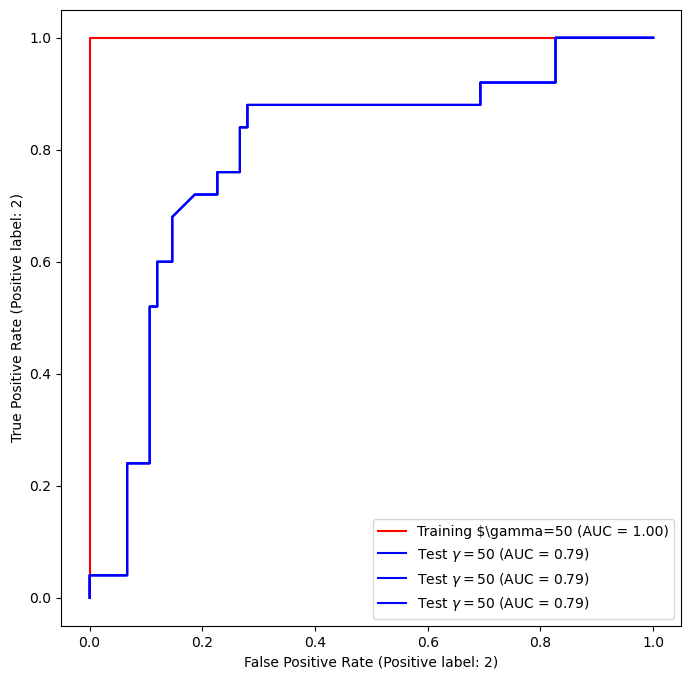

In [63]:
roc_curve(svm_flex,
         X_test,
         y_test,
         name='Test $\gamma=50$',
         color='b',
         ax=ax)
fig

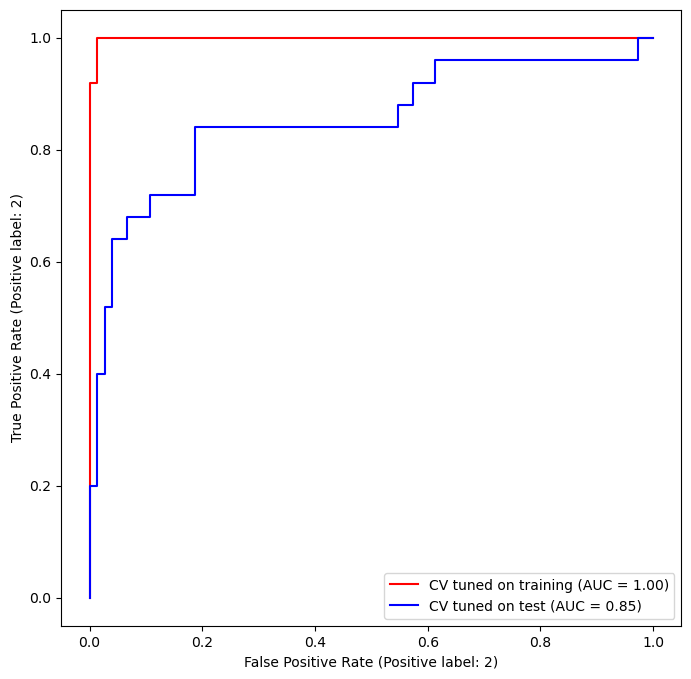

In [67]:
# lets look at our tuned SVM model

fig, ax = subplots(figsize=(8,8))
for (X_, y_, c, name) in zip((X_train, X_test),
                            (y_train, y_test),
                            ("r", "b"),
                            ("CV tuned on training",
                            "CV tuned on test")):
    roc_curve(best_svm,
             X_,
             y_,
             name=name,
             ax=ax,
             color=c)

# 9.6.4 SVM with Multiple Classes

If the response is a factor containing more than two levels, then the `SVC()` function will perform multi-class classification using either the on-versus-one approach( when `decision_function_shape=='ovo'`) or one-versus-rest (when `decision_function_shape=='ovr'`). We explore that setting briefly here by generating a third class of observations.

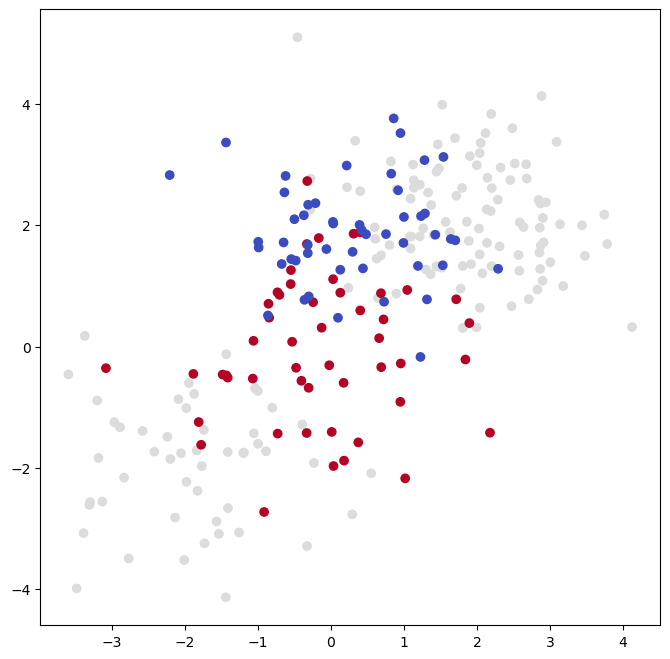

In [68]:
rng = np.random.default_rng(123)
X = np.vstack([X, rng.standard_normal((50,2))])
y = np.hstack([y, [0]*50])

X[y==0,1] += 2

fig,ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm)


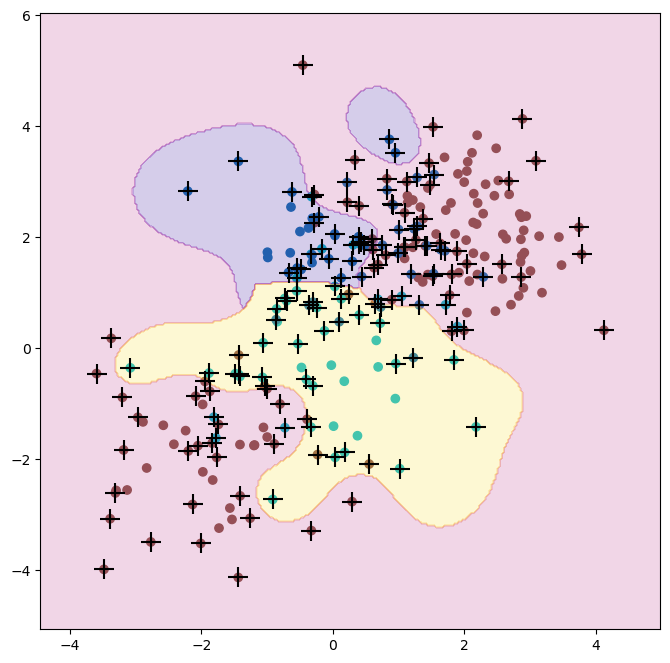

In [70]:
# now lets fit an SVM to this data

svm_rbf_3 = SVC(kernel='rbf',
               C=10,
               gamma=1,
               decision_function_shape='ovo')

svm_rbf_3.fit(X, y)

fig, ax = subplots(figsize=(8,8))
plot_svm(X,
        y,
        svm_rbf_3,
        scatter_cmap=cm.tab10,
        ax=ax)

# Application to Gene Expression Data

We will examine the `khan` dataset, which consists of a number of tissue samples corresponding to four distinct types of small round blue cell tumors. For each tissue sample, gene expression measurements are available. 

For each tissue sample, gene expression measurements are available. The dataset consists of training data, `xtrain` and `ytrain`, `xtest` and `ytest`


In [71]:
Khan = load_data("Khan")
Khan['xtrain'].shape, Khan['xtest'].shape

((63, 2308), (20, 2308))

This data set consists of expression measurements for 2,308 genes. The training and test sets consist of 63 and 20 observations, respectively.

We will use a support vector approach to predict cancer subtype using gene expression measurements. In this data set, there is a very large number of reatures relative to the number of observations. This suggests that we should use a linear kernel, because the additional flexibility that will result from using a polynomial or radial kernel is unneccessary. 


In [74]:
khan_linear = SVC(kernel='linear', C=10)
khan_linear.fit(Khan['xtrain'], Khan['ytrain'])
confusion_table(khan_linear.predict(Khan['xtrain']), Khan['ytrain'])

Truth,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


We see that there are no training errors. In fact, this is not surprising, because the large number of variables relative to the number of observations implies that it is easy to find hyperplanes that fully separate the classes. We are more interested in the support vector classifier's performance on the test observations.


In [75]:
confusion_table(khan_linear.predict(Khan['xtest']), Khan['ytest'])

Truth,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,2,0
3,0,0,4,0
4,0,0,0,5


We see that `C=10` yields two test set errors on these data.